In [73]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplt
import math
import numpy as np
import datetime
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from matplotlib import style
style.use('ggplot')

In [74]:
quandl.ApiConfig.api_key = "cEh-jxUpaQHd9tEBq5pF"

In [75]:
df = quandl.get('CHRIS/MGEX_IH1')
print(df.head())

              Open    High     Low    Last  Volume  Open Interest
Date                                                             
2005-01-03  321.00  321.00  321.00  321.00     0.0            0.0
2005-01-04  318.00  318.00  318.00  318.00     0.0            0.0
2005-01-05  319.25  319.25  319.25  319.25     0.0            0.0
2005-01-06  328.00  328.00  328.00  328.00     0.0            0.0
2005-01-07  328.00  329.50  328.00  329.50     0.0            0.0


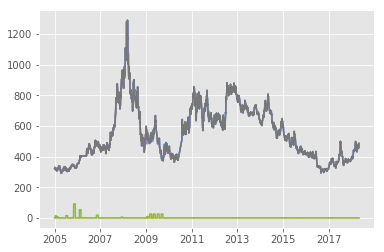

In [76]:
pyplt.plot(df)

In [77]:
df['hl'] = (df['High'] - df['Last']) / df['Last'] * 100.0
df['change'] = (df['Last'] - df['Open']) / df['Open'] * 100.0
df = df[['Last', 'hl', 'change', 'Volume']]

In [78]:
forecast_col = 'Last'
df.fillna(-99999, inplace=True)


In [79]:
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)


In [80]:
x = np.array(df.drop(['label'], 1))
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]


df.dropna(inplace=True)
y = np.array(df['label'])


In [81]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)
classifier = LinearRegression()
classifier.fit(x_train, y_train)
accuracy = classifier.score(x_test, y_test)
print(accuracy)

0.8144713396063223


In [82]:
df['forecast'] = np.nan

In [83]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [84]:
forecast_set = classifier.predict(x_lately)
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

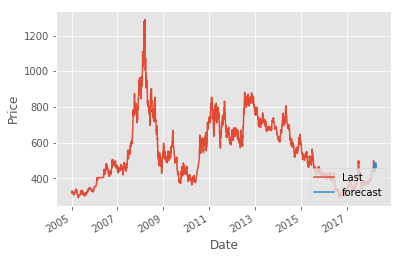

In [85]:
df['Last'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()